# 1st Program

Q1 (25th percentile): 1050.0
Q3 (75th percentile): 1500.0
Interquartile Range (IQR): 450.0


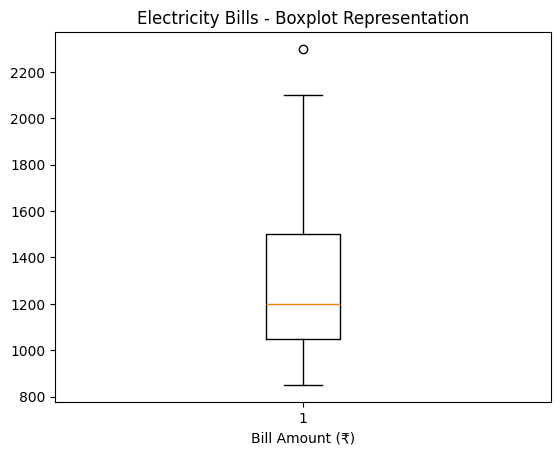

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bills = [850, 900, 950, 980, 1000, 1020, 1050, 1075, 1100, 1125,
         1150, 1175, 1200, 1250, 1300, 1350, 1400, 1450, 1500,
         1600, 1700, 1800, 1900, 2100, 2300]

Q1 = np.percentile(bills, 25)
Q3 = np.percentile(bills, 75)
IQR = Q3 - Q1

print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("Interquartile Range (IQR):", IQR)

plt.boxplot(bills)
plt.title("Electricity Bills - Boxplot Representation")
plt.xlabel("Bill Amount (₹)")
plt.show()

# 2nd Program

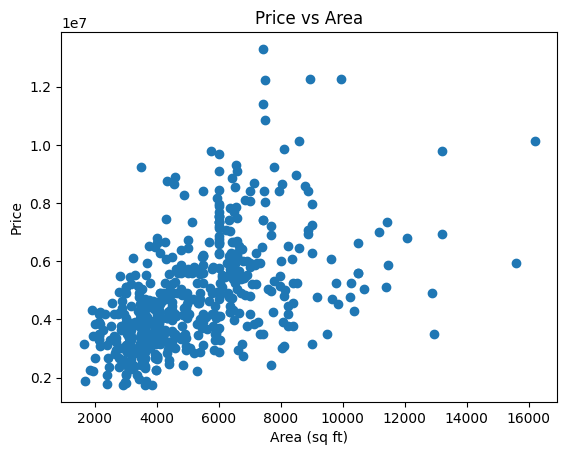

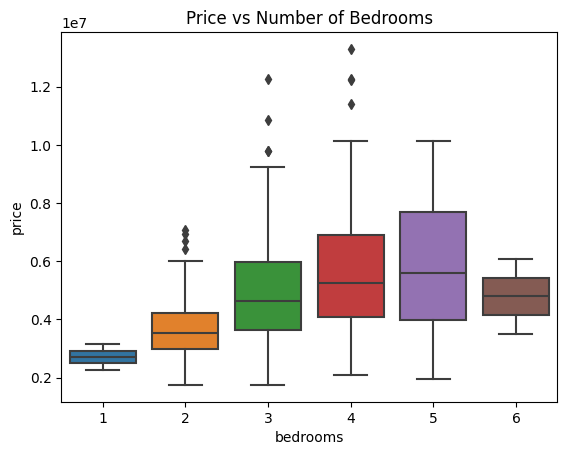

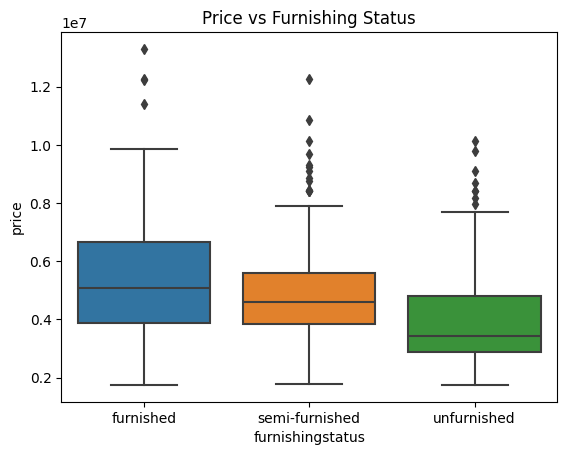

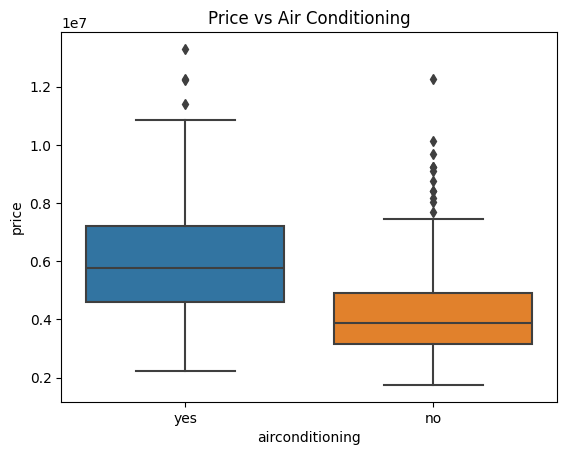

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("datasets/Housing.csv")

# Scatter plot: Price vs Area
plt.scatter(df["area"], df["price"])
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.title("Price vs Area")
plt.show()

# Boxplot: Price vs Bedrooms
sns.boxplot(x="bedrooms", y="price", data=df)
plt.title("Price vs Number of Bedrooms")
plt.show()


# Boxplot: Price vs Furnishing Status
sns.boxplot(x="furnishingstatus", y="price", data=df)
plt.title("Price vs Furnishing Status")
plt.show()

# Boxplot: Price vs Air Conditioning
sns.boxplot(x="airconditioning", y="price", data=df)
plt.title("Price vs Air Conditioning")
plt.show()

# 3rd Program

c:\Users\amitj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\amitj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\amitj\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


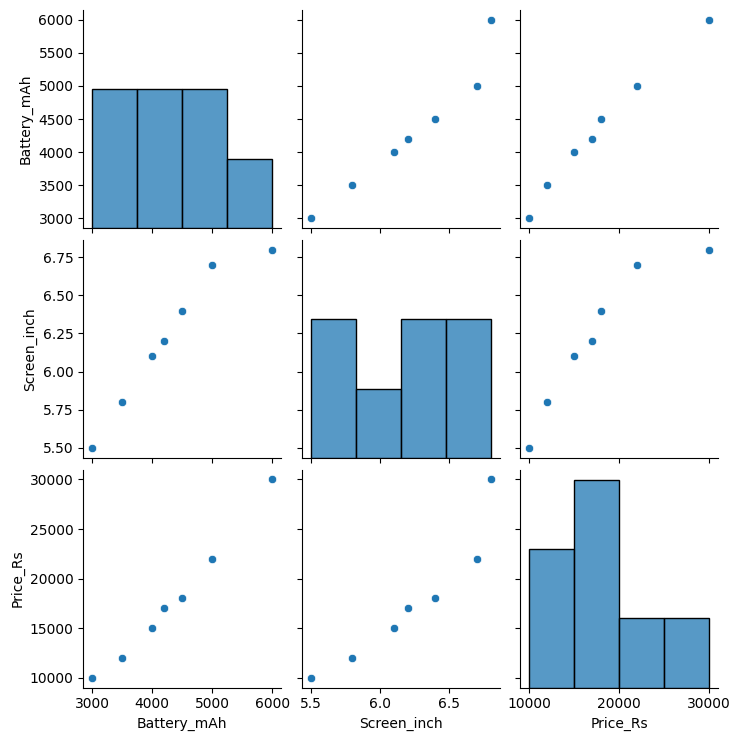

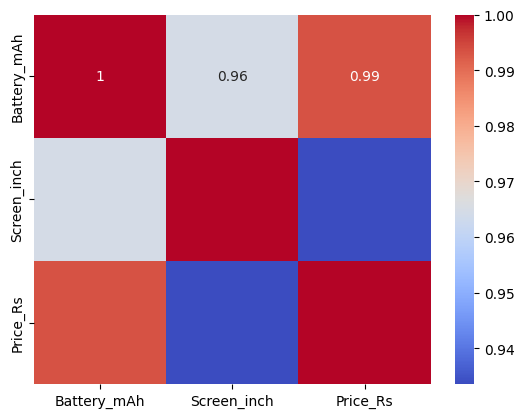

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Battery_mAh': [3000, 4000, 4500, 5000, 6000, 3500, 4200],
    'Screen_inch': [5.5, 6.1, 6.4, 6.7, 6.8, 5.8, 6.2],
    'Price_Rs': [10000, 15000, 18000, 22000, 30000, 12000, 17000]
}

df = pd.DataFrame(data)

sns.pairplot(df)
plt.show()

corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

# 4th Program

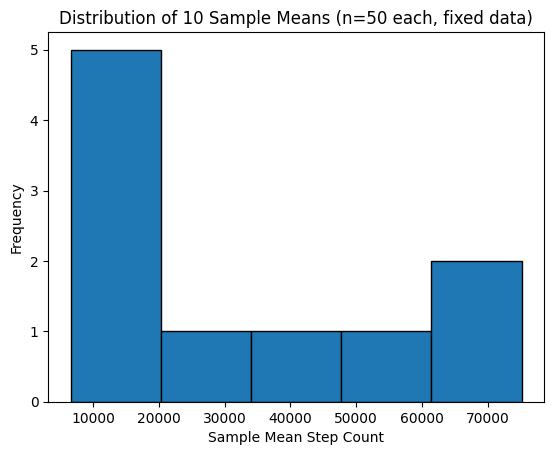

Smaple meane 31752.76531007752


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define a fixed right-skewed population (100 users for simplicity)
population = [
    3000, 3500, 4000, 4200, 4300, 4500, 4600, 4700, 4800, 5000,
    5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100,
    6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100,
    7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100,
    8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100,
    9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 10000, 10500,
    11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 
    20000, 22000, 25000, 27000, 30000, 35000, 40000, 45000, 50000, 60000,
    70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000,
    160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000
]

population = np.array(population)

# Step 2: Define 10 fixed samples (each of size 50)
samples = [
    population[0:50],
    population[10:60],
    population[20:70],
    population[30:80],
    population[40:90],
    population[50:100],
    np.concatenate([population[0:25], population[50:75]]),
    np.concatenate([population[10:35], population[60:85]]),
    np.concatenate([population[20:45], population[70:95]]),
    np.concatenate([population[5:30], population[80:105]])  # clipped at 100
]

# Step 3: Compute sample means
sample_means = [np.mean(s) for s in samples]

# Step 4: Plot histogram of sample means
plt.hist(sample_means, bins=5, edgecolor='black')
plt.xlabel("Sample Mean Step Count")
plt.ylabel("Frequency")
plt.title("Distribution of 10 Sample Means (n=50 each, fixed data)")
plt.show()

print("Sample mean",np.mean(sample_means))


# 5th Program

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

df = sns.load_dataset('titanic')

# WOE & IV function
def woe_iv(data, feature, target):
    temp = data[[feature, target]].dropna()
    groups = temp.groupby(feature)[target].agg(['count', 'sum'])
    
    good = groups['count'] - groups['sum']
    bad = groups['sum']
    
    good_pct = good / good.sum()
    bad_pct = bad / bad.sum()
    
    woe = np.log(good_pct / bad_pct)
    iv = ((good_pct - bad_pct) * woe).sum()
    
    return woe.to_dict(), iv

# Apply WOE to features and calculate IV
for col in ['sex', 'pclass']:
    woe_map, iv = woe_iv(df, col, 'survived')
    df[col + '_woe'] = df[col].map(woe_map)
    print(f"{col} - IV: {iv:.4f}")

print("\n", df[['sex', 'sex_woe', 'pclass', 'pclass_woe']])


sex - IV: 1.3417
pclass - IV: 0.5009

         sex   sex_woe  pclass  pclass_woe
0      male  0.983833       3    0.666483
1    female -1.529877       1   -1.003916
2    female -1.529877       3    0.666483
3    female -1.529877       1   -1.003916
4      male  0.983833       3    0.666483
..      ...       ...     ...         ...
886    male  0.983833       2   -0.364485
887  female -1.529877       1   -1.003916
888  female -1.529877       3    0.666483
889    male  0.983833       1   -1.003916
890    male  0.983833       3    0.666483

[891 rows x 4 columns]


In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Step 1: Documents (2 Sports + 2 Politics)
sports_docs = [
    "The football team won the championship after a thrilling match.",
    "The basketball player scored a record number of points this season."
]

politics_docs = [
    "The government passed a new policy to improve the education system.",
    "The election campaign focused on economic growth and healthcare reforms."
]

# Combine all documents
documents = sports_docs + politics_docs

# Step 2: Bag of Words (BoW)
bow = CountVectorizer()
bow_matrix = bow.fit_transform(documents)

print("Bag of Words Matrix:\n", bow_matrix.toarray())
print("Feature Names (Words):\n", bow.get_feature_names_out())

# Step 3: TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(documents)

print("\nTF-IDF Matrix:\n", tfidf_matrix.toarray())
print("Feature Names (Words):\n", tfidf.get_feature_names_out())

Bag of Words Matrix:
 [[1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 1 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 2 0 0 1 0]
 [0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]]
Feature Names (Words):
 ['after' 'and' 'basketball' 'campaign' 'championship' 'economic'
 'education' 'election' 'focused' 'football' 'government' 'growth'
 'healthcare' 'improve' 'match' 'new' 'number' 'of' 'on' 'passed' 'player'
 'points' 'policy' 'record' 'reforms' 'scored' 'season' 'system' 'team'
 'the' 'this' 'thrilling' 'to' 'won']

TF-IDF Matrix:
 [[0.35159705 0.         0.         0.         0.35159705 0.
  0.         0.         0.         0.35159705 0.         0.
  0.         0.         0.35159705 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.35159705 0.36695585
  0.         0.35159705 0. 

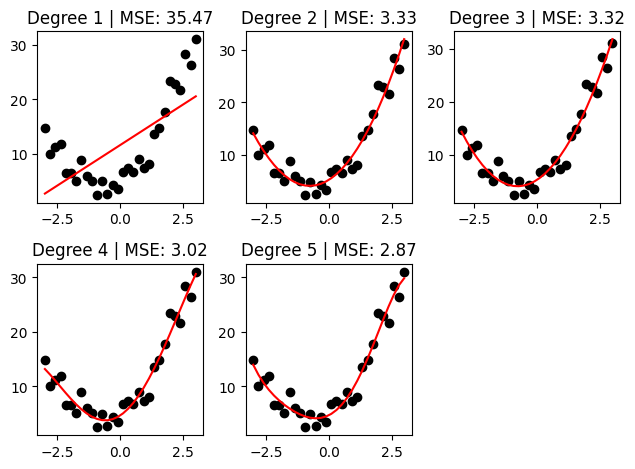

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = np.linspace(-3, 3, 30).reshape(-1, 1)
y = 2 * X**2 + 3 * X + 5 + np.random.randn(30, 1) * 2

# Try different degrees
degrees = [1, 2, 3, 4, 5]

for i, d in enumerate(degrees, 1):
    # Transform and fit
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Predict and calculate error
    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    
    # Plot
    plt.subplot(2, 3, i)
    plt.scatter(X, y, color='black')
    plt.plot(X, y_pred, color='red')
    plt.title(f'Degree {d} | MSE: {mse:.2f}')

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load and prepare data
data = pd.read_csv('datasets/titanic.csv')
data['sex'] = data['sex'].map({'male':0, 'female':1})
data['age'] = data['age'].fillna(data['age'].median())
X = data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = data['survived']

# Step 2: Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Linear SVM
model1 = SVC(kernel='linear', random_state=42)
model1.fit(X_train, y_train)
print("Linear SVM Accuracy:", accuracy_score(y_test, model1.predict(X_test)))
print(classification_report(y_test, model1.predict(X_test)))

# Step 4: RBF SVM
model2 = SVC(kernel='rbf', random_state=42)
model2.fit(X_train, y_train)
print("\nRBF SVM Accuracy:", accuracy_score(y_test, model2.predict(X_test)))
print(classification_report(y_test, model2.predict(X_test)))


Linear SVM Accuracy: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


RBF SVM Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     671.7
Date:                Mon, 15 Dec 2025   Prob (F-statistic):           1.48e-57
Time:                        23:46:09   Log-Likelihood:                -1213.3
No. Observations:                 100   AIC:                             2433.
Df Residuals:                      97   BIC:                             2441.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4125.1268   2.37e+04      0.174      0.8

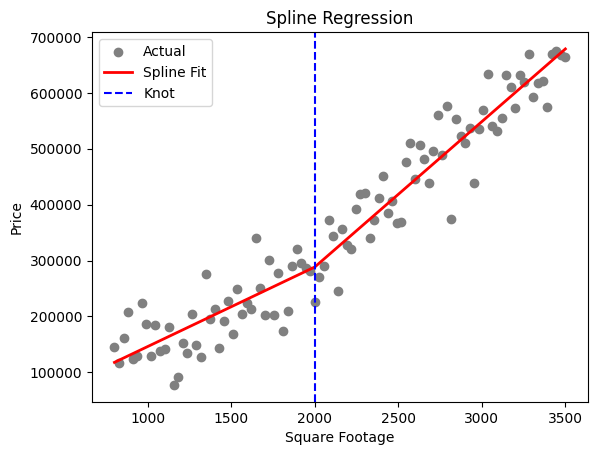


Slope before 2000: 142.19
Change after 2000: 117.81
Slope after 2000: 259.99


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Step 1: Generate data with knot at 2000
np.random.seed(42)
sqft = np.linspace(800, 3500, 100)
price = 150*sqft + np.where(sqft > 2000, 100*(sqft - 2000), 0) + np.random.normal(0, 50000, 100)
data = pd.DataFrame({'sqft': sqft, 'price': price})

# Step 2: Create spline term (knot at 2000)
data['spline'] = np.where(data['sqft'] > 2000, data['sqft'] - 2000, 0)

# Step 3: Fit model
X = sm.add_constant(data[['sqft', 'spline']])
model = sm.OLS(data['price'], X).fit()
print(model.summary())

# Step 4: Visualize
plt.scatter(data['sqft'], data['price'], color='gray', label='Actual')
plt.plot(data['sqft'], model.predict(X), color='red', linewidth=2, label='Spline Fit')
plt.axvline(2000, color='blue', linestyle='--', label='Knot')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Spline Regression')
plt.legend()
plt.show()

# Step 5: Interpretation
print(f"\nSlope before 2000: {model.params['sqft']:.2f}")
print(f"Change after 2000: {model.params['spline']:.2f}")
print(f"Slope after 2000: {model.params['sqft'] + model.params['spline']:.2f}")


Linear Regression MSE: 2900.193628493482
Ridge Regression MSE: 2892.014565750172
LASSO Regression MSE: 2884.6242887352128


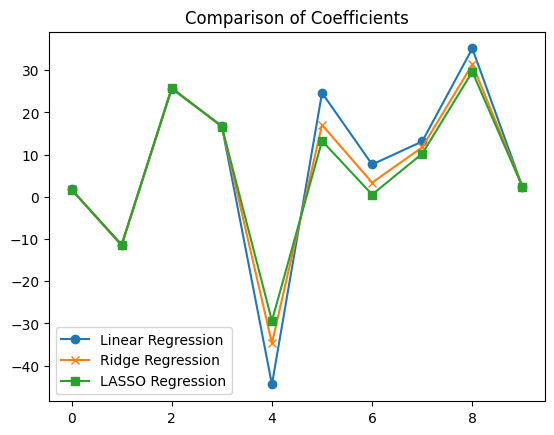

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit models
lr = LinearRegression().fit(X_train, y_train)
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
lasso = Lasso(alpha=0.1).fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Evaluate
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("LASSO Regression MSE:", mean_squared_error(y_test, y_pred_lasso))

# Compare coefficients
plt.plot(lr.coef_, marker='o', label='Linear Regression')
plt.plot(ridge.coef_, marker='x', label='Ridge Regression')
plt.plot(lasso.coef_, marker='s', label='LASSO Regression')
plt.legend()
plt.title("Comparison of Coefficients")
plt.show()


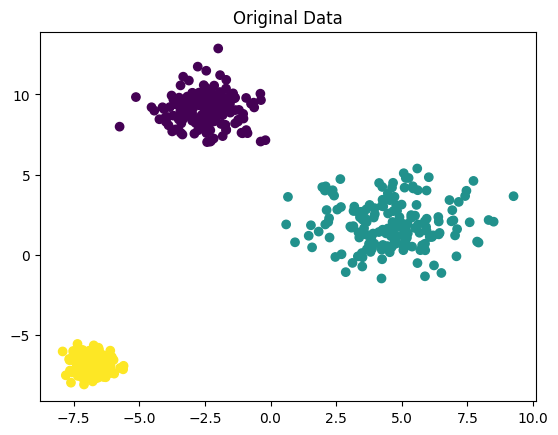

Means:
 [[ 4.60127512  1.91120737]
 [-6.8554136  -6.81834252]
 [-2.51338322  9.03494021]]
Covariances:
 [[[ 2.54225064  0.0537275 ]
  [ 0.0537275   2.1062588 ]]

 [[ 0.19379047 -0.02251871]
  [-0.02251871  0.25920083]]

 [[ 0.90127373 -0.01317541]
  [-0.01317541  0.95415182]]]
Weights:
 [0.33400201 0.332      0.33399799]


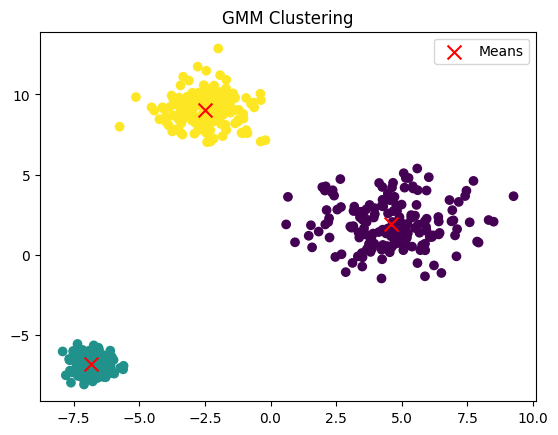

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# Step 1: Generate data with 3 clusters
X, y_true = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=[1.0, 1.5, 0.5], random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis')
plt.title("Original Data")
plt.show()

# Step 2: Fit GMM
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)

# Step 3: Show parameters
print("Means:\n", gmm.means_)
print("Covariances:\n", gmm.covariances_)
print("Weights:\n", gmm.weights_)

# Step 4: Visualize clusters
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X), cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='x', s=100, label="Means")
plt.title("GMM Clustering")
plt.legend()
plt.show()


Covariance Matrix:
           X1        X2
X1  0.962858  0.408811
X2  0.408811  1.124575


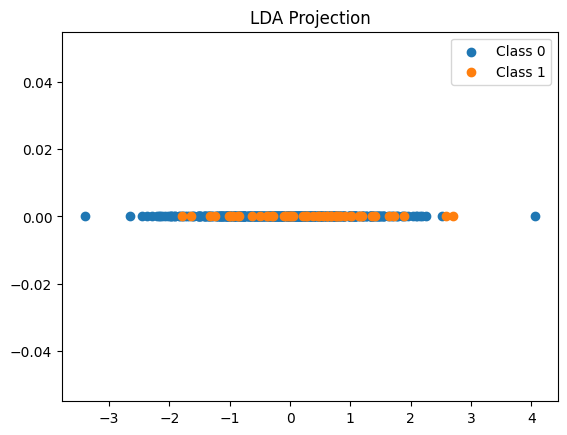

              precision    recall  f1-score   support

           0       0.93      0.53      0.68        94
           1       0.04      0.33      0.08         6

    accuracy                           0.52       100
   macro avg       0.48      0.43      0.38       100
weighted avg       0.87      0.52      0.64       100

X1: Coef=-0.44, Odds Ratio=0.65
X2: Coef=0.35, Odds Ratio=1.41


In [5]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Step 1: Create simple dataset
np.random.seed(42)
X1 = np.random.normal(0, 1, 500)
X2 = 0.5*X1 + np.random.normal(0, 1, 500)
y = np.random.choice([0, 1], size=500, p=[0.9, 0.1])
df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})

# Step 2: Show covariance matrix
print("Covariance Matrix:\n", df[['X1', 'X2']].cov())

# Step 3: Apply LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(df[['X1','X2']], df['y'])
plt.scatter(X_lda[df['y']==0], np.zeros(sum(df['y']==0)), label='Class 0')
plt.scatter(X_lda[df['y']==1], np.zeros(sum(df['y']==1)), label='Class 1')
plt.title("LDA Projection")
plt.legend()
plt.show()

# Step 4: Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(df[['X1','X2']], df['y'], test_size=0.2, random_state=42)
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

# Step 5: Show odds ratios
coef = model.coef_[0]
for i, name in enumerate(['X1','X2']):
    print(f"{name}: Coef={coef[i]:.2f}, Odds Ratio={np.exp(coef[i]):.2f}")
